In [1]:
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import itertools

In [2]:
def generate_hpf(bins,simple=True):
    """  Hartmann production function (differential distribution)
    from New Views of the Moon (2006) p. 548
    
    inputs:
    -------
    bins: listlike or arraylike, bins should be logarithmic in base 2 
        production function will be generated as a function of left bin edge
        
    simple: boolean, default = True
        if True, assumes the central (original) power-law applies everywhere
        if False, computes a piecewise function
    """
    
    log_hpf = np.zeros(len(bins)-1)
    
    for i,Dleft in enumerate(bins[:-1]):
        Dright = bins[i+1]
        
        if (simple==False) and (Dleft<=1.41):
            log_hpf[i] = -2.616 - 3.82 * np.log10(Dleft)
        elif (simple==True) or ((Dleft>1.41) and (Dleft<=64)):
            log_hpf[i] = -2.920 - 1.80 * np.log10(Dleft)
        elif (simple==False) and (Dleft>64):
            log_hpf[i] = -2.198 - 2.20 * np.log10(Dleft)
        else:
            print "WTF", Dleft
            
    return log_hpf

In [3]:
# logarithmic bins in base2
bins = np.logspace(1,7.5,14,base=2)

In [4]:
log_hpf = generate_hpf(bins)
hpf = 10**log_hpf
print hpf

[  3.45259795e-04   1.85020143e-04   9.91498395e-05   5.31330834e-05
   2.84733144e-05   1.52584714e-05   8.17681235e-06   4.38184524e-06
   2.34817272e-06   1.25835461e-06   6.74335536e-07   3.61367466e-07
   1.93652030e-07]


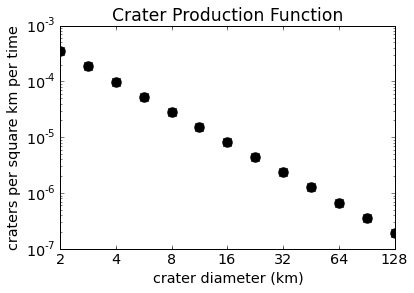

In [5]:
plt.plot(bins[:-1],hpf,'ko',ms=10)
plt.xscale("log",basex=2)
plt.yscale("log")
plt.ylabel("craters per square km per time",fontsize='x-large')
plt.xlabel("crater diameter (km)",fontsize="x-large")
ax = plt.gca()
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.tick_params(labelsize="x-large")
ax.set_title("Crater Production Function",fontsize="xx-large")
plt.savefig("hartman_production_function.png",bbox_inches="tight",dpi=600)

OK, I'm scaling kind of by eye from the plot I have from Marcel's lab. 

In [6]:
ages = [3.0,3.5,3.7,4.0] # Gyr
scale_diams = [64,64,4,16] # km
scale_N = [0.6,1,700,300] # craters per 10^6 square km
scale_locs = [np.where(bins==diam)[0][0] for diam in scale_diams]
hpf_to_scale = hpf[scale_locs]
scales = scale_N / hpf_to_scale

In [7]:
print scales

[   889764.76503581   1482941.27505969   7060021.51278749
  36689113.94349191]


In [8]:
def setup_axes(ax):
    ax.set_xscale("log",basex=2)
    ax.set_yscale("log")
    ax.set_xlim(2,128)
    ax.set_ylim(0.1,1000)
    ax.set_yticklabels([0,0.1,1,10,100,1000])
    ax.set_xticklabels([1,2,4,8,16,32,64,128])
    ax.set_xticks([3,6,12,24,32,48,64,96],minor=True)
    ax.tick_params(labelsize="large")
    ax.grid(which='both',axis='y')
    ax.grid(which='major',axis='x',linestyle="-",color="k")
    ax.set_ylabel("Craters per 1,000,000 square km",fontsize="x-large")
    ax.set_xlabel("Crater Diameter (km)",fontsize="x-large")

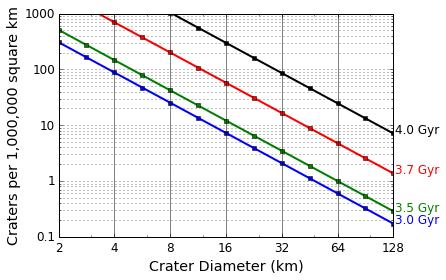

In [9]:
def plot_isochrons(ax):
    colors=["b","g","r","k"]
    for i,age in enumerate(ages):
        plt.plot(bins[:-1],hpf*scales[i],color=colors[i],lw=2,marker="s",ms=4)
        plt.text(130,hpf[-1]*scales[i],"{:.1f} Gyr".format(age),color=colors[i],fontsize="large")
    setup_axes(ax)
ax = plt.subplot(111)
plot_isochrons(ax)
plt.savefig("crater_isochrons.png",dpi=300,bbox_inches="tight")

The plot above shows crater density as a function of size. Craters in a certain bin are counted and then the density is scaled from the source image to craters per 10^6 km^2.

A surface's age means how long ago it was last wiped clean (re-surfaced), typically by lava flows although a massive impact can also wipe a region relatively clean. The four calibration lines above show the ages of different lunar surfaces for which we have radiometric isotope data from the Apollo missions.  The rapid increase in crater density between 4-3.5 Gyr ago indicates the late heavy bombardment.  Cratering rapidly slows down after 3.5 Gyr ago.

In [10]:
# generate a set of crater strikes from the HPF
norm_hpf = hpf/np.sum(hpf)
print norm_hpf
num_craters = 400
binned_draw = np.random.choice(bins[:-1],size=num_craters,replace=True,p=norm_hpf)
sorted_draw = np.sort(binned_draw)
random_errors = np.zeros(num_craters)
for i in range(len(bins)-1):
    this_loc = np.where((sorted_draw>=bins[i]) & (sorted_draw<bins[i+1]))[0]
    num_this = len(this_loc)
    sorted_draw[this_loc] = np.random.uniform(bins[i],bins[i+1],size=num_this)
    random_errors[this_loc] = abs(np.random.normal(0.0,bins[i]**0.25,size=num_this))
print sorted_draw[-20:]
print random_errors[-20:]
crater_diams = sorted_draw
crater_diam_errs = random_errors

[  4.64252810e-01   2.48786921e-01   1.33321610e-01   7.14452817e-02
   3.82865785e-02   2.05172694e-02   1.09949324e-02   5.89203840e-03
   3.15746520e-03   1.69204370e-03   9.06743770e-04   4.85911955e-04
   2.60393769e-04]
[   9.08691042   10.35755297   12.73052587   13.85804677   12.2951382
   15.51169991   11.66426985   13.85443313   12.83904521   15.29853567
   17.63636526   16.09672007   16.31508038   17.92266169   21.61710883
   23.79920521   25.64112523   46.00148788   96.95381568  125.09270225]
[ 3.38756195  3.64128271  0.21999031  1.44877184  0.54936383  0.82596117
  3.65217597  0.50226745  0.16763463  2.29431128  1.25698645  0.07418771
  0.34392065  1.82115257  3.49398621  1.54800219  3.28294505  0.86666541
  0.28548407  1.08375783]


In [11]:
crater_hist = np.histogram(crater_diams,bins=bins)

In [12]:
print crater_hist

(array([183, 108,  53,  25,  13,   8,   5,   2,   0,   1,   0,   2,   0]), array([   2.        ,    2.82842712,    4.        ,    5.65685425,
          8.        ,   11.3137085 ,   16.        ,   22.627417  ,
         32.        ,   45.254834  ,   64.        ,   90.50966799,
        128.        ,  181.01933598]))


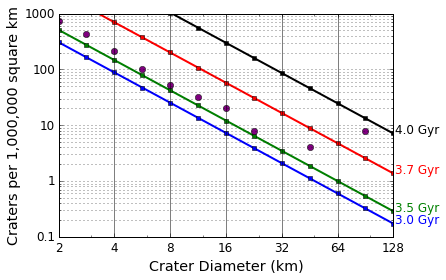

In [13]:
ax = plt.subplot(111)
plot_isochrons(ax)
x = bins[:-1]
plt.plot(x,crater_hist[0]*4,'o',color='purple')

In [14]:
def resample_histogram(y,y_errs,bins,iterations=1000):
    ax = plt.subplot(111)
    plot_isochrons(ax)
    num_bins = len(bins)-1
    num_y = len(y)
    samples = np.zeros((iterations,num_bins),int)
    for i in range(iterations):
        y_resampled = np.random.normal(loc=y,scale=y_errs,size=num_y)
        samples[i],junk_bins = np.histogram(y_resampled,bins=bins)
        plt.plot(junk_bins[:-1],samples[i]*4,'ko',alpha=0.2)
    avg_counts = [np.median(samples[:,j]) for j in range(num_bins)]
    std_counts = [np.std(samples[:,j]) for j in range(num_bins)]
    plt.plot(x,crater_hist[0]*4,'o',color='purple')
    return avg_counts,std_counts

[102.0, 102.0, 65.0, 35.0, 14.0, 10.0, 5.0, 2.0, 0.0, 1.0, 0.0, 2.0, 0.0] [6.8788847933367805, 7.1972766377290238, 5.9945374300274405, 4.2862429935784085, 2.7371866943999272, 1.8375755766770516, 1.3218165530814026, 0.77306597389873533, 0.42445141064673114, 0.39465301215118076, 0.0, 0.063118935352238004, 0.063118935352238004]


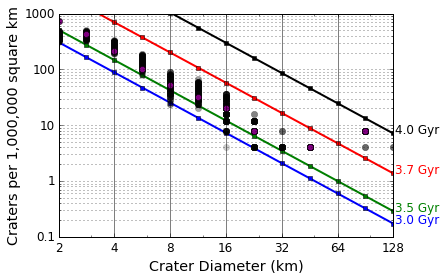

In [16]:
avg_count,std_count = resample_histogram(crater_diams,crater_diam_errs,bins)
print avg_count,std_count

Write out cratering data AND isochrone data

In [17]:
# Write out the CRATER data
f = open("craters_250000sqkm.csv","w")
f.write("Diam(km),Diam_err(km)")
for diam,diam_err in itertools.izip(crater_diams,crater_diam_errs):
    f.write("\n{0:.2f},{1:.2f}".format(diam,diam_err))
f.close()

In [18]:
# Write out the BINNED data
f = open("crater_data.csv","w")
f.write("Diam(km),count_per_million_km,count_error")
for bb,count,count_err in itertools.izip(bins[:-1],avg_count*4,std_count*4):
    f.write("\n{0:.2f},{1:.2f},{2}".format(bb,count,count_err))
f.close()

In [19]:
f = open("crater_isochrones.csv","w")
f.write("Diam(km),3.0Gyr,3.5Gyr,3.7Gyr,4.0Gyr")
for i,diam in enumerate(bins[:-1]):
    f.write("\n{0:.2f}".format(diam))
    for s in scales:
        f.write(",{0:.2f}".format(hpf[i]*s))
f.close()